#Curso de Inteligencia Artificial y Machine Learning
### EOI - Garantía Juvenil
Módulo 7 - Deep Learning para Visión Artificial

Proyecto nº3

# Clasificación de imágenes con modelos de Deep Learning

En este proyecto, se pide contruir un modelo clasificador para distinguir entre imágenes de gatos y perros. Para ello, utilizaremos un dataset reducido extraido del famoso dataset de la competición de Kaggle de 2013 lanzada por Google "Dogs vs Cats"

Primero, importaremos las bibliotecas necesarias para este ejercicio

In [ ]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para cargar los datos, ejecuta la siguiente celda:

In [ ]:
# Ejecuta esto para descargarte el dataset. Podrás encontrar los archivos en el
# directorio correspondiente en la pestaña de Archivos en el menú de la izquierda.

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

!unzip /tmp/cats_and_dogs_filtered.zip

Te recomendamos crear las variables de las rutas de los directorios de datos de entrenamiento y validación:

In [ ]:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

## 1. Modelo convolucional normal

Vas a entrenar un modelo de red neuronal convolucional con el dataset mencionado. Para ello, necesitamos hacer un preprocesamiento de las imágenes utilizando el módulo ImageDataGenerator que creará un generador que recorrerá los directorios de imágenes creados, adaptando las imágenes para que sean reconocibles por el modelo.

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255).flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

valid_gen = ImageDataGenerator(rescale = 1/255).flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


1.1. Construye un modelo que contenga capas convolucionales, de pooling y neuronales, incluyendo, al menos, dos capas convolucionales y dos capas neuronales.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear un modelo secuencial
model = models.Sequential()

# Capa de convolución 1
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Capa de convolución 2
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanar la salida de la capa convolucional para las capas completamente conectadas
model.add(layers.Flatten())

# Capa completamente conectada 1
model.add(layers.Dense(8, activation='relu'))

# Capa completamente conectada 2 (capa de salida)
model.add(layers.Dense(1, activation='sigmoid'))  # Clasificación binaria, por lo tanto, función de activación sigmoid



1.2. Compila el modelo usando función de coste 'binary_crossentropy', optimizador RMSprop (puedes hacerlo usando optimizer = optimizers.RMSprop(learning_rate = 1e-4), y métrica 'accuracy'

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

1.3. Entrena el modelo con datos de entrenamiento y test preparados, utilizando, al menos, 30 epochs, y guarda los resultados de éste en una variable "history"

In [ ]:
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=30,  # Entrena durante al menos 30 epochs
    validation_data=valid_gen,
    validation_steps=len(valid_gen)
)

Epoch 1/30
100/100 [==============================] - 16s 58ms/step - loss: 0.6938 - accuracy: 0.5105 - val_loss: 0.6896 - val_accuracy: 0.5480
Epoch 2/30
100/100 [==============================] - 6s 60ms/step - loss: 0.6844 - accuracy: 0.5585 - val_loss: 0.6803 - val_accuracy: 0.5460
Epoch 3/30
100/100 [==============================] - 5s 47ms/step - loss: 0.6713 - accuracy: 0.6105 - val_loss: 0.6708 - val_accuracy: 0.5920
Epoch 4/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6550 - accuracy: 0.6485 - val_loss: 0.6680 - val_accuracy: 0.5640
Epoch 5/30
100/100 [==============================] - 6s 59ms/step - loss: 0.6432 - accuracy: 0.6590 - val_loss: 0.6497 - val_accuracy: 0.6370
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6266 - accuracy: 0.6690 - val_loss: 0.6430 - val_accuracy: 0.6230
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6103 - accuracy: 0.6795 - val_loss: 0.6328 - val_accuracy: 0.641

Vamos a representar los resultados del entrenamiento. Te dejamos un código de ejemplo, en el que puedes adaptar los nombres de las variables que corresponda.

<ipython-input-16-00c4c49ef862>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b',label='Validation accuracy', color="red")
<ipython-input-16-00c4c49ef862>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b',label='Validation loss', color="red")


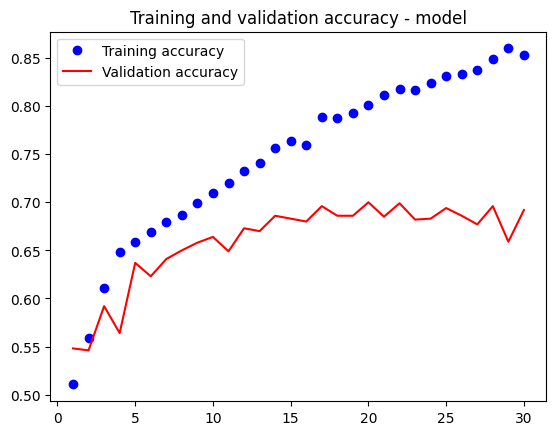

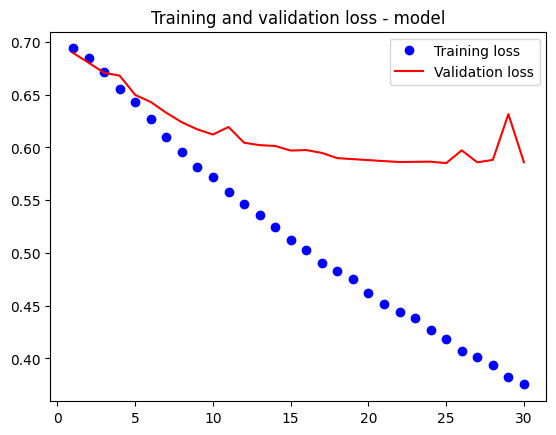

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy', color="red")
plt.title('Training and validation accuracy - model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss', color="red")
plt.title('Training and validation loss - model')
plt.legend()

1.4. ¿Qué conclusiones puedes sacar viendo las gráficas?¿Crees que hay overfitting?¿A qué crees que es debido?

- Si creo que existe un claro overfitting, sobretodo viendo lo que divergen ambas graficas. El overfitting puede estar debido a un gran numero de epocs ya que a partir del epoc 5 apenas hay mejora.

## 2. Modelo con Data Augmentation

Ahora vamos a intentar mejorar el modelo recurriendo a la técnica del "Data Augmentation" o aumentar el número de imágenes disponibles para el entrenamiento modificando ligeramente las que ya tenemos. Para ello, creamos, de nuevo, un generador, pero esta vez, con argumentos de modificación de las imágenes.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               rotation_range=20,
                               shear_range=0.2,
                               horizontal_flip=True,
                               zoom_range=0.2)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size = (150,150),
                                              batch_size = 32,
                                              class_mode = 'binary')

valid_gen = valid_datagen.flow_from_directory(validation_dir,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Echamos un vistazo a las imágenes tras las modificaciones

0.0


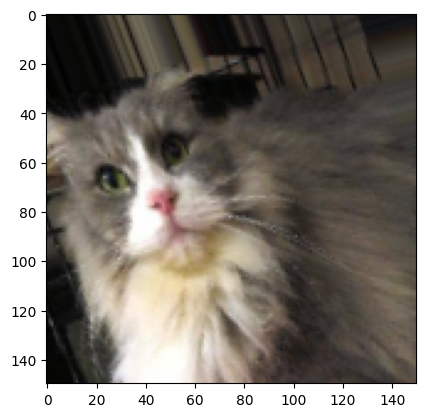

In [ ]:
import matplotlib.pyplot as plt

batchX, batchY = next(train_gen)

plt.imshow(batchX[0])
print(batchY[0])

2.1. Construye un modelo similar al anterior, pero, esta vez, incluye una capa de dropout justo antes de la capa neuronal de mayor número de neuronas. Utiliza los mismos parámetros para la compilación, y realiza el entrenamiento, esta vez, con 100 epochs.

In [ ]:
from tensorflow.keras.layers import Dropout

model_with_dropout = models.Sequential([
    layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),  # Capa de Dropout con una tasa del 50%
    layers.Dense(8, activation='relu'),  # Menos neuronas en esta capa
    layers.Dense(1, activation='sigmoid')
])

model_with_dropout.compile(loss='binary_crossentropy',
                          optimizer=optimizers.RMSprop(learning_rate=1e-4),
                          metrics=['accuracy'])

history_with_dropout = model_with_dropout.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=100,  # Entrenar durante 100 epocs
    validation_data=valid_gen,
    validation_steps=len(valid_gen)
)


Epoch 1/100
63/63 [==============================] - 20s 279ms/step - loss: 0.6963 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 15s 238ms/step - loss: 0.6934 - accuracy: 0.4925 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 16s 246ms/step - loss: 0.6934 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 15s 234ms/step - loss: 0.6935 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 14s 230ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
63/63 [==============================] - 15s 235ms/step - loss: 0.6932 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
63/63 [==============================] - 16s 251ms/step - loss: 0.6931 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy:

2.2. Muestra, de nuevo, la representación de los resultados del entrenamiento en dos gráficas, una para el accuracy y otra para el loss.

<ipython-input-15-c26813f70483>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b',label='Validation accuracy', color="red")
<ipython-input-15-c26813f70483>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b',label='Validation loss', color="red")


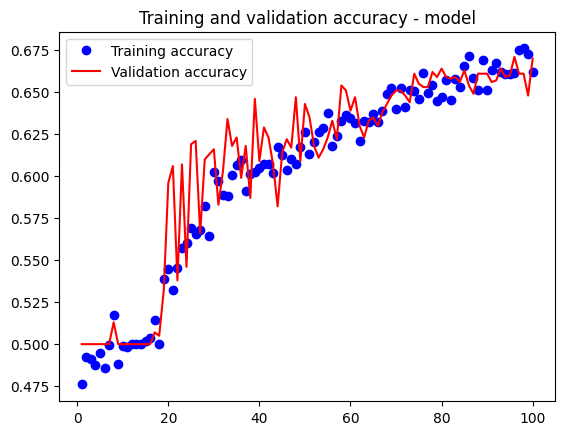

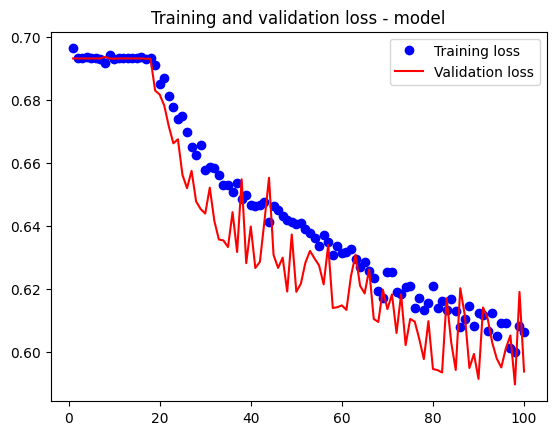

In [ ]:
acc = history_with_dropout.history['accuracy']
val_acc = history_with_dropout.history['val_accuracy']
loss = history_with_dropout.history['loss']
val_loss = history_with_dropout.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo',label='Training accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation accuracy', color="red")
plt.title('Training and validation accuracy - model')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss', color="red")
plt.title('Training and validation loss - model')
plt.legend()

2.3. ¿Qué conclusiones sacas viendo las gráficas?¿Ha mejorado el resultado del modelo?¿Hay overfitting? Comenta cualquier otra cosa que te haya llamado la atención.

- Parece que la grafica de training esta vez se adecua mucho mas a la de validation, aun dando unos valores menores de accuracy.

## 3. Modelo preentrenado VGG16 con "feature extraction" (BONUS)

Vamos a intentar mejorar el comportamiento de nuestro modelo recurriendo al modelo VGG16, entrenado con el famoso dataset de imágenes ImageNet. Para ello, debes importarlo de Keras, pasando los argumentos:

- *weights ='imagenet'*, pues queremos usar los parámetros que resultan de haber entrenado esta arquitectura de capas con el dataset de ImageNet.
- *include_top = False*, porque no queremos incluir la última capa de clasificación, que está configurada para distinguir entre 1000 clases de imágenes, y en nuestro caso tenemos solo dos.
- *input_shape = (150,150,3)*

In [ ]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

Vamos a definir una función que extraiga las "features" principales de las imágenes que se le pasen a través del parametro directory.

In [ ]:
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

3.1. Crea un objeto generador datagen con ImageDataGenerator que solo normalice imágenes (dividiendo por 255). También, asigna a las variables train_features, train_labels lo que devuelve la función extract_features, con argumentos train_dir y 2000. Finalmente, asigna a las variables validation_features, validations_labels lo que devuelve la función extract_features al pasarle como argumentos validation_dir y 1000.

In [ ]:
datagen = # escribe aquí la llamada a ImageDataGenerator

train_features, train_labels = # escribe aquí la llamada a la función con argumentos (train_dir, 2000)
validation_features, validation_labels = # escribe aquí la llamada a la función con argumentos (validation_dir, 1000)

SyntaxError: ignored

Aplicamos reshape a las "features" extraidas para adaptarlas a las capas neuronales.

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))

3.2. Construye ahora un modelo con, al menos, dos capas de redes neuronales y, al menos, una capa dropout. En la primera capa, de tipo Dense, recuerda incluir el parámetro input_dim= 4*4*512

3.3 Compila el modelo usando el optimizador RMSprop, loss 'binary_crossentropy' y metrics 'acc'. Entrena el modelo con train_features y train_labels como datos de entrada, y validation_features y validation_labels como datos de validación. Utiliza 20 epochs.

3.4 Vuelve a representar las gráficas de entrenamiento

¿Qué conclusiones puedes sacar? ¿Ha mejorado el desempeño del modelo?¿Hay overfitting?

## 4. Fine-Tunning de modelo VGG16 (BONUS)

Finalmente, vamos a generar un nuevo modelo utilizando el modelo base de VGG16, pero, esta vez, reentrenarás el modelo, apartir de una serie de capas congeladas. Para facilitarte esta parte, te proporcionamos todas las celdas de código, pero debes ejecutarlas y añadir tus observaciones sobre la finalidad de las distintas partes de éste, además de indicar, en tu entrega final, las métricas que hayas conseguido alcanzar y tus propias conclusiones sobre qué modelo es mejor.

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_dir)
valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(validation_dir)

In [ ]:
vgg_model = VGG19(include_top=False, weights="imagenet", input_shape=(256, 256, 3))

for layer in vgg_model.layers[:12]:
  layer.trainable = False

In [ ]:
model_ft = models.Sequential()

model_ft.add(vgg_model)

model_ft.add(layers.Flatten())
model_ft.add(layers.Dense(units=100, activation="relu"))
model_ft.add(layers.Dense(units=2,   activation="softmax"))

model_ft.summary()

In [ ]:
model_ft.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["acc"])

history = model_ft.fit(train_gen, validation_data=valid_gen, epochs=20)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - Fine-Tunning')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Fine-Tunning')
plt.legend()

plt.show()